In [52]:
#Loading Dataset

import pandas as pd
df = pd.read_csv("adult_with_headers.csv")
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)  # strip whitespace in object columns
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [53]:
#Data-Preprocessing

#Finding Missing Values

for col in df.select_dtypes(include=object).columns:
    n_q = (df[col] == '?').sum()
    if n_q > 0:
        print(f"{col}: {n_q} missing ('?')")

workclass: 1836 missing ('?')
occupation: 1843 missing ('?')
native_country: 583 missing ('?')


In [54]:
#Handling Missing Values

df_clean = df.replace('?', pd.NA).dropna().reset_index(drop=True)
df_clean.shape

(30162, 15)

In [55]:
#Summary Statistics
numeric_cols = df.select_dtypes(include=['number']).columns
df_clean[numeric_cols].describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [56]:
# #Feature Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Select numeric columns
numeric_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

# Create a copy to avoid SettingWithCopyWarning
X_num = df_clean[numeric_cols].copy().astype(float)

# StandardScaler - proper implementation
std_scaler = StandardScaler()
df_clean[numeric_cols] = std_scaler.fit_transform(X_num)  # Transform all at once

print("After StandardScaler:")
print("Means:", df_clean[numeric_cols].mean().round(2).to_dict())
print("Stds:", df_clean[numeric_cols].std().round(2).to_dict())

# MinMaxScaler - proper implementation
minmax_scaler = MinMaxScaler()
X_mm = minmax_scaler.fit_transform(X_num)  # Using the copy we made earlier

print("\nAfter MinMaxScaler:")
print("Minimum values:", np.min(X_mm, axis=0).round(2))
print("Maximum values:", np.max(X_mm, axis=0).round(2))
df_clean
# #Use Min-Max Scaler if: data has fixed bounds. Because it is highly sensitive to outliers.
# #Use Standard Scaler if: data has outliers or follows a Normal distribution.

After StandardScaler:
Means: {'age': 0.0, 'fnlwgt': 0.0, 'education_num': -0.0, 'capital_gain': -0.0, 'capital_loss': 0.0, 'hours_per_week': -0.0}
Stds: {'age': 1.0, 'fnlwgt': 1.0, 'education_num': 1.0, 'capital_gain': 1.0, 'capital_loss': 1.0, 'hours_per_week': 1.0}

After MinMaxScaler:
Minimum values: [0. 0. 0. 0. 0. 0.]
Maximum values: [1. 1. 1. 1. 1. 1.]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.042796,State-gov,-1.062722,Bachelors,1.128918,Never-married,Adm-clerical,Not-in-family,White,Male,0.146092,-0.218586,-0.077734,United-States,<=50K
1,0.880288,Self-emp-not-inc,-1.007871,Bachelors,1.128918,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.147445,-0.218586,-2.331531,United-States,<=50K
2,-0.033340,Private,0.244693,HS-grad,-0.439738,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.147445,-0.218586,-0.077734,United-States,<=50K
3,1.108695,Private,0.425240,11th,-1.224066,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.147445,-0.218586,-0.077734,United-States,<=50K
4,-0.794697,Private,1.406658,Bachelors,1.128918,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.147445,-0.218586,-0.077734,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,Private,0.638972,Assoc-acdm,0.736754,Married-civ-spouse,Tech-support,Wife,White,Female,-0.147445,-0.218586,-0.244682,United-States,<=50K
30158,0.118931,Private,-0.335252,HS-grad,-0.439738,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.147445,-0.218586,-0.077734,United-States,>50K
30159,1.489374,Private,-0.358575,HS-grad,-0.439738,Widowed,Adm-clerical,Unmarried,White,Female,-0.147445,-0.218586,-0.077734,United-States,<=50K
30160,-1.251511,Private,0.110705,HS-grad,-0.439738,Never-married,Adm-clerical,Own-child,White,Male,-0.147445,-0.218586,-1.747213,United-States,<=50K


In [66]:
#2. Encoding Techniques

from sklearn.preprocessing import LabelEncoder

df_enc = df_clean.copy()
# One-hot encode 'sex'
df_enc = pd.get_dummies(df_enc, columns=['sex'], dtype=int)
# Label encode other categorical features
cols_label = ['workclass','education','marital_status','occupation','relationship','race','native_country']
for col in cols_label:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

df_enc.head(20)

#One-Hot Encoding: Ensures a categorical feature with k values becomes k (or k-1) binary features.
#Pros: It avoids implying any order among categories
#Cons: However, it can create many extra columns for high-cardinality features.

#Label Encoding: Produces a single column and is space-efficient. 
#pros: It is suitable if the categories are ordinal. 
#Cons: The drawback is the implied ordinal relationship: e.g. encoding countries as 0,1,2 could make a model think “2 > 0” is meaningful. This can lead to incorrect inferences

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
0,0.042796,5,-1.062722,9,1.128918,4,0,1,4,0.146092,-0.218586,-0.077734,38,<=50K,0,1
1,0.880288,4,-1.007871,9,1.128918,2,3,0,4,-0.147445,-0.218586,-2.331531,38,<=50K,0,1
2,-0.033340,2,0.244693,11,-0.439738,0,5,1,4,-0.147445,-0.218586,-0.077734,38,<=50K,0,1
3,1.108695,2,0.425240,1,-1.224066,2,5,0,2,-0.147445,-0.218586,-0.077734,38,<=50K,0,1
4,-0.794697,2,1.406658,9,1.128918,2,9,5,2,-0.147445,-0.218586,-0.077734,4,<=50K,1,0
5,-0.109476,2,0.897180,12,1.521083,2,3,5,4,-0.147445,-0.218586,-0.077734,38,<=50K,1,0
6,0.804152,2,-0.280232,6,-2.008395,3,7,1,2,-0.147445,-0.218586,-2.081109,22,<=50K,1,0
7,1.032559,4,0.187865,11,-0.439738,2,3,0,4,-0.147445,-0.218586,0.339636,38,>50K,0,1
8,-0.566290,2,-1.363097,12,1.521083,4,9,1,4,1.754199,-0.218586,0.757005,38,>50K,1,0
9,0.271203,2,-0.287217,9,1.128918,2,3,0,4,0.551697,-0.218586,-0.077734,38,>50K,0,1


In [67]:
#Feature Engineerng

df_feat = df_enc.copy()
df_feat['capital_net'] = df_feat['capital_gain'] - df_feat['capital_loss']
# Define "married" as category labels 1 or 2 in marital_status (as encoded above)
df_feat['is_married'] = df_feat['marital_status'].isin([1,2]).astype(int)
df_feat[['capital_gain','capital_loss','capital_net','marital_status','is_married']].head(5)

#Net Capital Gain (capital_net): This is defined as (capital_gain - capital_loss). It captures the net effect of capital transactions, combining two related attributes into one. 
#Rationale: someone with large gains but also large losses might have different outcome than someone with small or zero net gain.

#Married Status (is_married): A binary indicator that is 1 if the individual is married (we consider “Married-civ-spouse” or “Married-AF-spouse” as married) and 0 otherwise.
#Rationale: marital status is known to correlate with income (married people often have different income distributions) and combining some categories may simplify the model.

,capital_gain,capital_loss,capital_net,marital_status,is_married
0,0.146092,-0.218586,0.364678,4,0
1,-0.147445,-0.218586,0.071141,2,1
2,-0.147445,-0.218586,0.071141,0,0
3,-0.147445,-0.218586,0.071141,2,1
4,-0.147445,-0.218586,0.071141,2,1


In [68]:
#Log Transformation

import numpy as np
df_feat['log_capital_gain'] = np.log1p(df_feat['capital_gain'])
print("Skewness before:", np.round(df_feat['capital_gain'].skew(),2))
print("Skewness after (log1p):", np.round(df_feat['log_capital_gain'].skew(),2))

#The skewness of capital_gain drops from about 11.9 to 3.07 after the log transform, indicating a much more symmetric distribution.
#Reducing skew helps many models (like linear regression) make more reliable inferences.


Skewness before: 11.9
Skewness after (log1p): 5.83


In [69]:
#Feature Selection

from sklearn.ensemble import IsolationForest

features_for_if = df_feat[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','capital_net']]
iso = IsolationForest(random_state=42, contamination=0.05)
outlier_pred = iso.fit_predict(features_for_if)
outliers = (outlier_pred == -1)
print("Outliers detected:", outliers.sum())

#Outliers can distort model training. In particular, “outliers can mislead the process, skewing the regression line or decision boundary” and thus harm generalization.
#We use Isolation Forest to detect anomalies among numeric features (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week, capital_net). 
df_no_outliers = df_feat.loc[~outliers].reset_index(drop=True)
df_no_outliers.shape

#Why remove? Outliers can cause models to overfit or bias (especially sensitive methods like linear regression)
#For example, very high capital gains could skew a regression fit.

Outliers detected: 1509


(28653, 19)

In [71]:
df_2 = df_no_outliers.copy()
df_2['income'] = LabelEncoder().fit_transform(df_2['income'])
df_2.head(20)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male,capital_net,is_married,log_capital_gain
0,0.042796,5,-1.062722,9,1.128918,4,0,1,4,0.146092,-0.218586,-0.077734,38,0,0,1,0.364678,0,0.136358
1,0.880288,4,-1.007871,9,1.128918,2,3,0,4,-0.147445,-0.218586,-2.331531,38,0,0,1,0.071141,1,-0.159517
2,-0.033340,2,0.244693,11,-0.439738,0,5,1,4,-0.147445,-0.218586,-0.077734,38,0,0,1,0.071141,0,-0.159517
3,1.108695,2,0.425240,1,-1.224066,2,5,0,2,-0.147445,-0.218586,-0.077734,38,0,0,1,0.071141,1,-0.159517
4,-0.794697,2,1.406658,9,1.128918,2,9,5,2,-0.147445,-0.218586,-0.077734,4,0,1,0,0.071141,1,-0.159517
5,-0.109476,2,0.897180,12,1.521083,2,3,5,4,-0.147445,-0.218586,-0.077734,38,0,1,0,0.071141,1,-0.159517
6,0.804152,2,-0.280232,6,-2.008395,3,7,1,2,-0.147445,-0.218586,-2.081109,22,0,1,0,0.071141,0,-0.159517
7,1.032559,4,0.187865,11,-0.439738,2,3,0,4,-0.147445,-0.218586,0.339636,38,1,0,1,0.071141,1,-0.159517
8,0.271203,2,-0.287217,9,1.128918,2,3,0,4,0.551697,-0.218586,-0.077734,38,1,0,1,0.770283,1,0.439349
9,-0.109476,2,0.858203,15,-0.047574,2,3,0,2,-0.147445,-0.218586,3.261224,38,1,0,1,0.071141,1,-0.159517


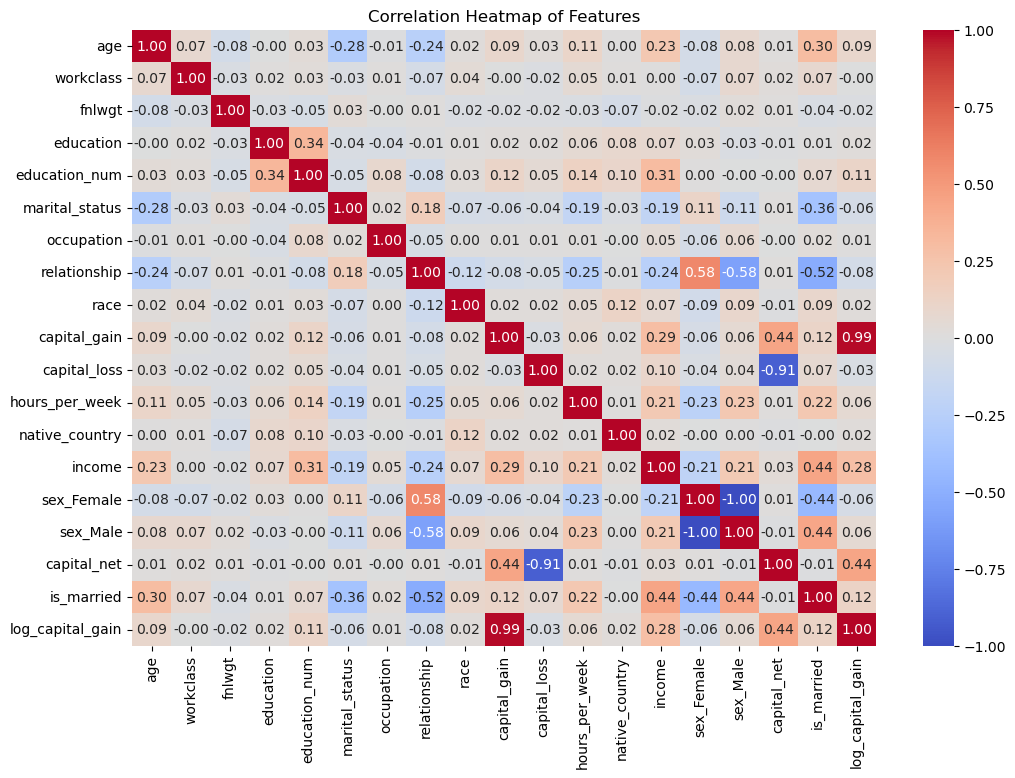

In [72]:
#Predictive Power Score (PPS) vs. Correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
# corr = df.corr(numeric_only=True)
corr = df_2.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [73]:
df_no_outliers.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male,capital_net,is_married,log_capital_gain
0,0.042796,5,-1.062722,9,1.128918,4,0,1,4,0.146092,-0.218586,-0.077734,38,<=50K,0,1,0.364678,0,0.136358
1,0.880288,4,-1.007871,9,1.128918,2,3,0,4,-0.147445,-0.218586,-2.331531,38,<=50K,0,1,0.071141,1,-0.159517
2,-0.033340,2,0.244693,11,-0.439738,0,5,1,4,-0.147445,-0.218586,-0.077734,38,<=50K,0,1,0.071141,0,-0.159517
3,1.108695,2,0.425240,1,-1.224066,2,5,0,2,-0.147445,-0.218586,-0.077734,38,<=50K,0,1,0.071141,1,-0.159517
4,-0.794697,2,1.406658,9,1.128918,2,9,5,2,-0.147445,-0.218586,-0.077734,4,<=50K,1,0,0.071141,1,-0.159517


In [77]:
#Predictive Power Score(PPS)

import ppscore as pps
pps_matrix = pps.matrix(df_no_outliers)

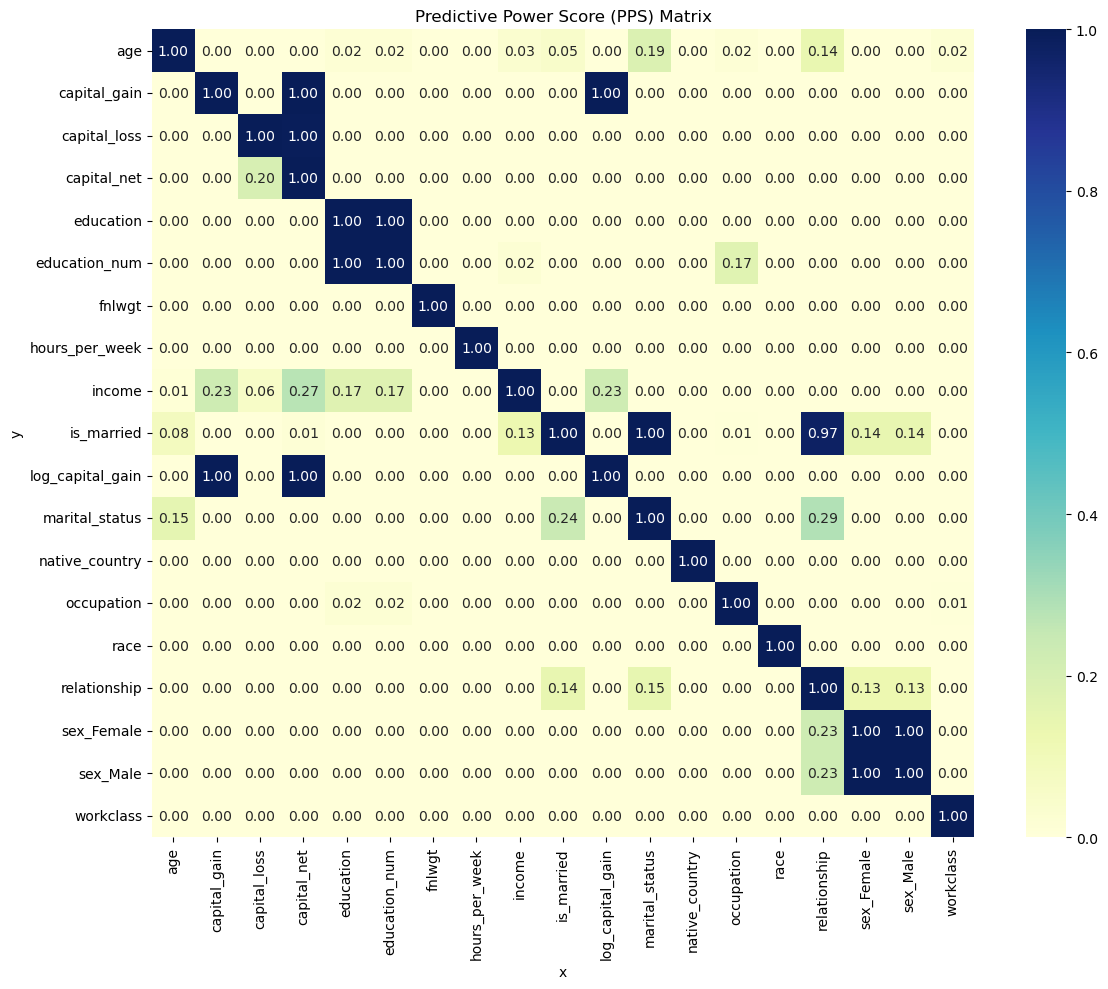

In [78]:
#Predictive Power Score(PPS)

pps_heatmap = pps.matrix(df_no_outliers)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(pps_heatmap, vmin=0, vmax=1, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Predictive Power Score (PPS) Matrix")
plt.tight_layout()
plt.show()


In [84]:
pps_matrix = pps.matrix(df_no_outliers)
pps_df = pps_matrix[(pps_matrix['x'] != pps_matrix['y']) & (pps_matrix['y'] == 'income')]
pps_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
13,age,income,0.007881,classification,True,weighted F1,0.667222,0.669844,DecisionTreeClassifier()
32,workclass,income,0.000000,classification,True,weighted F1,0.667222,0.667222,DecisionTreeClassifier()
51,fnlwgt,income,0.000000,classification,True,weighted F1,0.667222,0.644350,DecisionTreeClassifier()
70,education,income,0.171988,classification,True,weighted F1,0.667222,0.724455,DecisionTreeClassifier()
89,education_num,income,0.171988,classification,True,weighted F1,0.667222,0.724455,DecisionTreeClassifier()
108,marital_status,income,0.000000,classification,True,weighted F1,0.667222,0.667025,DecisionTreeClassifier()
127,occupation,income,0.000000,classification,True,weighted F1,0.667222,0.667222,DecisionTreeClassifier()
146,relationship,income,0.000000,classification,True,weighted F1,0.667222,0.667222,DecisionTreeClassifier()
165,race,income,0.000000,classification,True,weighted F1,0.667222,0.667222,DecisionTreeClassifier()
184,capital_gain,income,0.229490,classification,True,weighted F1,0.667222,0.743591,DecisionTreeClassifier()


In [88]:
#corelation matrix vs pps matrix


#Correlation measures linear relationships, while PPS (Predictive Power Score) captures any predictive relationship—linear or non-linear.

#In the correlation matrix, education_num and income show a moderate correlation (~0.33), but in PPS, the predictive score is higher (0.273), highlighting non-linear influence.

#Features like capital_gain have low correlation with income (~0.22) but appear with non-zero PPS (~0.2+), again suggesting non-linear predictive power.

#PPS is asymmetric, meaning X → Y may not equal Y → X, unlike correlation which is symmetric—this reveals directional predictive strength.

#Several features with zero correlation (like relationship and income) still have non-zero PPS, confirming PPS's advantage in revealing hidden patterns.